Estudo de Caso

Aqui na Escola Mais, uma área muito importante é a área de Cobrança, que garante o recebimento de crédito de inadimplentes, garantindo a segurança e a saúde financeira da instituição.

A planilha do link abaixo é composta de 3 abas diferentes:

Base de Devedores - Pais de alunos atuais que constam em nossa base como inadimplentes
Candidatos a Alunos - Pais de possíveis futuros alunos da escola
Resolução - Espaço para RESPOSTA DEFINITIVA DO CANDIDATO

Um bom trabalho de análise de dados irá evitar que pais inadimplentes sequer se matriculem na escola, garantindo uma menor taxa de inadimplência. Utilizando seus conhecimentos de análise de dados e as informações da nossa base de dados atual (Aba “Base Devedores”), determine um critério de linha de corte para garantir um bom equilíbrio entre inadimplência e número de alunos matriculados (não adianta ter uma análise de inadimplência que corte 50% dos novos alunos).

Orientações:

Crie uma cópia da planilha disponibilizada no link abaixo e trabalhe nela em seu computador. Cole o link da nova planilha (contendo a sua resposta) no campo abaixo como resposta do estudo de caso. Fique à vontade para criar quantas abas forem necessárias para seu rascunho. Apresente sua resposta de maneira sucinta, sem deixar de lado o embasamento analítico por trás da resposta.


# VISUALIZAÇÃO DOS DADOS

In [1]:
#### Primeiramente iremos importar a planilha para analisar os dados 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C://Users//HENRIQUE//Documents//processo_seletivo_escola//Case Vaga Estágio - Base de Devedores.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CPF                      118 non-null    object
 1   Deve? (Sim ou Não)       118 non-null    object
 2   Sim? Quanto?             118 non-null    object
 3   Score                    118 non-null    int64 
 4   Chance de Pagamento (%)  118 non-null    object
 5   Valor Mínimo de Salário  118 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.7+ KB


In [4]:
df.head()

,CPF,Deve? (Sim ou Não),Sim? Quanto?,Score,Chance de Pagamento (%),Valor Mínimo de Salário
0,xxx,sim,"18.455,10",16,"0,86",3.001
1,xxx,sim,"1.118,00",237,"17,87",3.001
2,xxx,sim,"568,25",240,"17,87",4.001
3,xxx,sim,"23.169,27",18,"0,86",1.001
4,xxx,sim,"8.688,08",204,"17,87",2.001


In [5]:
df

,CPF,Deve? (Sim ou Não),Sim? Quanto?,Score,Chance de Pagamento (%),Valor Mínimo de Salário
0,xxx,sim,"18.455,10",16,"0,86",3.001
1,xxx,sim,"1.118,00",237,"17,87",3.001
2,xxx,sim,"568,25",240,"17,87",4.001
3,xxx,sim,"23.169,27",18,"0,86",1.001
4,xxx,sim,"8.688,08",204,"17,87",2.001
...,...,...,...,...,...,...
113,xxx,sim,"6.166,59",252,"17,87",1.001
114,xxx,não,-,430,"66,56",2.001
115,xxx,sim,"801,58",21,"0,86",3.001
116,xxx,sim,"60.846,22",25,"0,86",1.001


## Realizando limpeza dos nossos dados

Começamos fazendo a limpeza dos dados

### Verificando a tipagem dos dados

Verificamos o tipo de cada dado, e verificamos que o Type de cada um é object, devemos transformar em float64

In [6]:
df.dtypes

CPF                        object
Deve? (Sim ou Não)         object
Sim? Quanto?               object
Score                       int64
Chance de Pagamento (%)    object
Valor Mínimo de Salário    object
dtype: object

### Coluna Deve? (Sim ou Não)

Verificamos que essa coluna possui valores com espaços, que atrapalham em sua classificação, vamos realizar a limpeza dos dados

In [7]:
# Conseguimos verificar que existem valores de sim e não com espaços
# Precisamos realizar a limpeza desses dados
df["Deve? (Sim ou Não)"].unique()

array(['sim ', 'não ', 'sim', 'não'], dtype=object)

In [8]:
df["Deve? (Sim ou Não)"] = df["Deve? (Sim ou Não)"].map({'sim ':'sim',
                                                        'não ': 'não',
                                                        'sim': 'sim',
                                                        'não': 'não'})

In [9]:
# Agora conseguimos verificar a lista correta sem valores com espaços 
df["Deve? (Sim ou Não)"].unique()

array(['sim', 'não'], dtype=object)

### Coluna Sim? Quanto?

In [10]:
df["Sim? Quanto?"].unique()

array(['18.455,10', '1.118,00', '568,25', '23.169,27', '8.688,08',
       '2.692,84', '-', '2 cheques sem fundo (não consta valor) ',
       '1.877,23', '10.522,58', '1.414,82', '4.021,39', '8.650,77',
       '8.933,56', '26.226,32', '2.472,70', '8.484,64', '5.154,45',
       '19.631,97', '356,11', '385,25', '801,79', '335.417,25',
       '56.284,36', '214,18', '237,49', '14.238,20', '96.928,61',
       '54.208,49', '304,54', '1.371.225,38', '4.776,45', '433,64',
       '422,32', '3.984,40', '33.451,23', '3.721,09', '1.015,82',
       '47.103,2', '3.506,17', '753,00', '6.503,52', '6.855,92', '629,16',
       '7.283,14', '140.990,45', '149.433,5', '11.319,83', '15.874,73',
       '1.217,58', '284,73', '9.950,63', '14.926,29', '22.264,28',
       '3.212,22', '21.792,49', '5.012,39', '101.933,08', '28.198,25',
       '6.278,09', '2.655,56', '23.230,01', '26.247,9', '6.949,4',
       '819,49', '207,77', '3.103,91', '4.496,38', '12.623,19',
       '10.639,97', '2.214,99', '8.729,89', '151,3

#### Cheque sem fundo
Devemos verificar se o cheque sem fundo foi passado propositalmente ou foi uma atitude sem a real intenção de ocasionar prejuízos a instituição de ensino

De acordo com a chance de pagamento alta, podemos supor que o encaminhamento de cheques sem fundo não foi realizado de forma intencional, este indìviduo deve ser contatado para avaliar sobre as questões de pagamento.

In [11]:
df[df["Sim? Quanto?"] == '2 cheques sem fundo (não consta valor) ']

,CPF,Deve? (Sim ou Não),Sim? Quanto?,Score,Chance de Pagamento (%),Valor Mínimo de Salário
7,xxx,sim,2 cheques sem fundo (não consta valor),600,"77,51",3.001


In [12]:
cheque_sem_fundo = df[df["Sim? Quanto?"] == '2 cheques sem fundo (não consta valor) ']

In [13]:
# Vamos retirar do nosso conjunto de dados e verificar a parte a questão da pessoa que passou o cheque sem fundo 
df = df[df["Sim? Quanto?"] != '2 cheques sem fundo (não consta valor) ']

#### Convertendo valores para float64

In [14]:
# Primeiro iremos colocar os valores como valor interpretável pelo python
# O valor ponto não existe em python, ele é considerado como vírgula, portanto vamos retirar esse valores
df["Sim? Quanto?"] = df["Sim? Quanto?"].str.replace('.', '')
# A vírgula no Brasil, para número decimal deve ser convertida como ponto para visualizar em Python
df["Sim? Quanto?"] = df["Sim? Quanto?"].str.replace(',', '.')
# Para conseguirmos verificar de forma numérica, vamos colocar a dívida em número, quem não deve nada o valor será 0
df["Sim? Quanto?"] = df["Sim? Quanto?"].str.replace('-', '0')

<ipython-input-14-1b6e0da5761e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sim? Quanto?"] = df["Sim? Quanto?"].str.replace('.', '')
<ipython-input-14-1b6e0da5761e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sim? Quanto?"] = df["Sim? Quanto?"].str.replace(',', '.')
<ipython-input-14-1b6e0da5761e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [15]:
df["Sim? Quanto?"]

0      18455.10
1       1118.00
2        568.25
3      23169.27
4       8688.08
         ...   
113     6166.59
114           0
115      801.58
116    60846.22
117     8688.08
Name: Sim? Quanto?, Length: 117, dtype: object

In [16]:
df["Sim? Quanto?"] = df["Sim? Quanto?"].astype('float64')

<ipython-input-16-4dee406cb9aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sim? Quanto?"] = df["Sim? Quanto?"].astype('float64')


### Coluna Score

In [17]:
df.Score.unique()

array([ 16, 237, 240,  18, 204,  92, 329, 252, 522,  35, 251, 343, 225,
        26, 484, 253,  25,  96, 379, 105, 177, 256, 234,  62, 352, 735,
         9, 863, 115,  54, 925, 346, 377,  37,  66,  46,  42, 384, 169,
       405, 213, 210, 672,  41, 409, 207, 216, 383, 192,  44,  88, 145,
       634,   7, 369, 598, 243, 140,  81,  28,  73,  48, 222, 336, 885,
        21,  12, 394,  69, 125, 550, 430,  50, 150, 166, 838,  19, 188],
      dtype=int64)

### Coluna Chance de Pagamento (%)

In [18]:
# Vamos visualizar os nossos dados de forma agrupada
# Podemos verificar que uma grande parcela do nosso grupo tem probabilidade alta de NÃO efetuar o pagamento
df.groupby("Chance de Pagamento (%)").count()['CPF']

Chance de Pagamento (%)
0,86     45
0.86      1
17,87    28
18,87     2
2,99     15
49,69    11
66,56     5
77,51     3
83,12     2
88,20     1
93,05     3
95,50     1
Name: CPF, dtype: int64

In [19]:
df["Chance de Pagamento (%)"].unique()

array(['0,86', '17,87', '49,69', '77,51', '18,87', '66,56', '0.86',
       '2,99', '88,20', '93,05', '95,50', '83,12'], dtype=object)

#### Convertendo valores para float64

In [20]:
df["Chance de Pagamento (%)"] = df["Chance de Pagamento (%)"].str.replace(',', '.')

<ipython-input-20-12edcf31959d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Chance de Pagamento (%)"] = df["Chance de Pagamento (%)"].str.replace(',', '.')


In [21]:
df["Chance de Pagamento (%)"].head()

0     0.86
1    17.87
2    17.87
3     0.86
4    17.87
Name: Chance de Pagamento (%), dtype: object

In [22]:
df["Chance de Pagamento (%)"] = df["Chance de Pagamento (%)"].astype('float64')

<ipython-input-22-4654811f2188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Chance de Pagamento (%)"] = df["Chance de Pagamento (%)"].astype('float64')


### Coluna Valor Mínimo de Salário

In [23]:
df['Valor Mínimo de Salário'].head()

0    3.001
1    3.001
2    4.001
3    1.001
4    2.001
Name: Valor Mínimo de Salário, dtype: object

In [24]:
df['Valor Mínimo de Salário'].unique()

array(['3.001', '4.001', '1.001', '2.001', '7.001', '5.001',
       'acima de 10.000 ', '0', 'acima de 10.000'], dtype=object)

In [25]:
df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].str.replace('.', '')

<ipython-input-25-a00b6ceaf475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].str.replace('.', '')


#### Acima de 10000
Apenas de forma aplicável, como não sabemos o salário dos que são classificados como acima de 10000 consideramos o slário desses individuos como 10000 para avaliar suas condições fincanceiras.

In [26]:
df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].str.replace('acima de 10000 ', '10000')
df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].str.replace('acima de 10000', '10000')

<ipython-input-26-8dea93b01a2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].str.replace('acima de 10000 ', '10000')
<ipython-input-26-8dea93b01a2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].str.replace('acima de 10000', '10000')


In [27]:
df['Valor Mínimo de Salário'].unique()

array(['3001', '4001', '1001', '2001', '7001', '5001', '10000', '0'],
      dtype=object)

#### Convertendo os valores para o tipo float64

In [28]:
df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].astype('float64')

<ipython-input-28-07f4c1f00c91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor Mínimo de Salário'] = df['Valor Mínimo de Salário'].astype('float64')


## Analisando devedores

In [29]:
# Vamos analisar a quantidade de devedores
devedores = df[df["Deve? (Sim ou Não)"] == "sim"]
devedores.CPF.count()

91

In [30]:
devedores

,CPF,Deve? (Sim ou Não),Sim? Quanto?,Score,Chance de Pagamento (%),Valor Mínimo de Salário
0,xxx,sim,18455.10,16,0.86,3001.0
1,xxx,sim,1118.00,237,17.87,3001.0
2,xxx,sim,568.25,240,17.87,4001.0
3,xxx,sim,23169.27,18,0.86,1001.0
4,xxx,sim,8688.08,204,17.87,2001.0
...,...,...,...,...,...,...
112,xxx,sim,25368.48,145,2.99,1001.0
113,xxx,sim,6166.59,252,17.87,1001.0
115,xxx,sim,801.58,21,0.86,3001.0
116,xxx,sim,60846.22,25,0.86,1001.0


In [31]:
# Vamos analisar os que não possuem dívidas com a escola
naodevedores = df[df["Deve? (Sim ou Não)"] == "não"]
naodevedores.CPF.count()

26

In [32]:
naodevedores

,CPF,Deve? (Sim ou Não),Sim? Quanto?,Score,Chance de Pagamento (%),Valor Mínimo de Salário
6,xxx,não,0.0,329,49.69,1001.0
9,xxx,não,0.0,522,77.51,7001.0
12,xxx,não,0.0,343,49.69,5001.0
15,xxx,não,0.0,484,66.56,2001.0
20,xxx,não,0.0,379,49.69,2001.0
27,xxx,não,0.0,352,49.69,2001.0
28,xxx,não,0.0,735,88.20,10000.0
33,xxx,não,0.0,863,93.05,3001.0
37,xxx,não,0.0,925,95.50,3001.0
38,xxx,não,0.0,346,49.69,3001.0


## Analisando a correlação entre os valores
Verificando a correlação entre os valores, podemos verificar que a representação entre probabilidade de pagamento e score representam praticamente a mesma informação, portanto podemos levar em análise apenas uma dessas duas colunas

In [33]:
df.corr()

,Sim? Quanto?,Score,Chance de Pagamento (%),Valor Mínimo de Salário
Sim? Quanto?,1.000000,-0.156084,-0.131095,0.075189
Score,-0.156084,1.000000,0.956353,0.088572
Chance de Pagamento (%),-0.131095,0.956353,1.000000,0.084441
Valor Mínimo de Salário,0.075189,0.088572,0.084441,1.000000


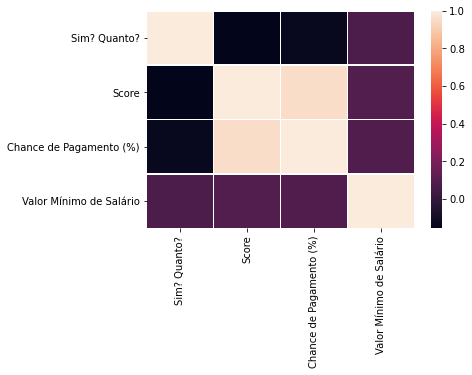

In [34]:
ax = sns.heatmap(df.corr(), linewidths=.5)

## Vamos agora analisar a proporção salário/divida

In [35]:
for index, row in df.iterrows():
    if row['Valor Mínimo de Salário']>0:
        df['proporcao'] = df["Sim? Quanto?"]/df['Valor Mínimo de Salário']

<ipython-input-35-84516fc12b37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proporcao'] = df["Sim? Quanto?"]/df['Valor Mínimo de Salário']


In [36]:
df.head()

,CPF,Deve? (Sim ou Não),Sim? Quanto?,Score,Chance de Pagamento (%),Valor Mínimo de Salário,proporcao
0,xxx,sim,18455.10,16,0.86,3001.0,6.149650
1,xxx,sim,1118.00,237,17.87,3001.0,0.372542
2,xxx,sim,568.25,240,17.87,4001.0,0.142027
3,xxx,sim,23169.27,18,0.86,1001.0,23.146124
4,xxx,sim,8688.08,204,17.87,2001.0,4.341869


## Criando o ambiente do gráfico

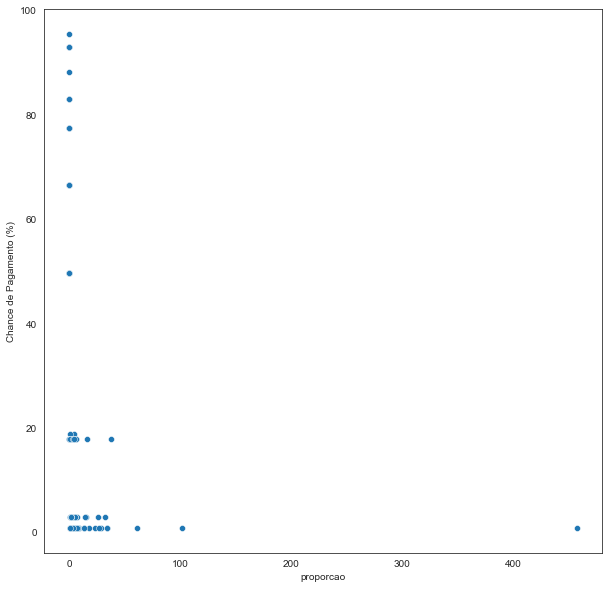

In [37]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
# Vamos criar um gráfico de dispersão para avaliar a proporção entre divida/salario e a chance de pagamento
# Assim conseguimos incluir o máximo possível de informações no nosso gráfico
g = sns.scatterplot(x='proporcao', y="Chance de Pagamento (%)", 
                    data=df)
plt.show()

In [39]:
df.std()

Sim? Quanto?               131300.322688
Score                         202.334873
Chance de Pagamento (%)        27.244594
Valor Mínimo de Salário      2435.123958
proporcao                            NaN
dtype: float64

In [43]:
df['Score'].mean()

210.1965811965812

In [42]:
df['Chance de Pagamento (%)'].mean()

20.201025641025613

In [44]:
df.count()

CPF                        117
Deve? (Sim ou Não)         117
Sim? Quanto?               117
Score                      117
Chance de Pagamento (%)    117
Valor Mínimo de Salário    117
proporcao                  117
dtype: int64

In [ ]:
z